## OASIS INFOBYTE INTERNSHIP

## TASK 3
## Project Name - CAR PRICE PREDICTION USING MACHINE LEARNING
## Intern - Sruthi Nalla
## Domain - Data Science¶

## Technologies used :
### 1. numpy and pandas ____ Data handling
### 2. matplotlib and  seaborn ____ Data visualization
### 3. scikit-learn ____ Machine Learning

### _Importing all necessary libraries that are required_

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### _Loading the Datasets from path_

In [7]:
data = pd.read_csv(r"C:\Users\Sruthi\Desktop\Oasis\Task_3\car data.csv")

In [10]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### _Checking for missing values_

In [17]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [19]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

### _Encoding the categorical variables_

In [22]:
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

### _Droping the irrevelent column_

In [25]:
data.drop(columns=['Car_Name'],inplace = True)

In [27]:
data.head(3)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0


### _Defining the features and target_

In [30]:
feature = data.drop(columns=['Selling_Price'])
target = data['Selling_Price']

In [32]:
feature

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [34]:
target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### _Training and Testing by using train_test_split_

In [37]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

### _Training a Linear Regression model_

In [40]:
model = LinearRegression()
model.fit(feature_train, target_train)

LinearRegression()

In [42]:
target_pred = model.predict(feature_test)

### _Evaluating model performance_

In [45]:
mean_abs = mean_absolute_error(target_test, target_pred)
mean_sqr = mean_squared_error(target_test, target_pred)
r2 = r2_score(target_test, target_pred)

In [47]:
mean_abs

1.2219323621757847

In [49]:
mean_sqr

3.5315798889713235

In [51]:
r2

0.8466902419662661

### _Data Visualization using Matplotlib_

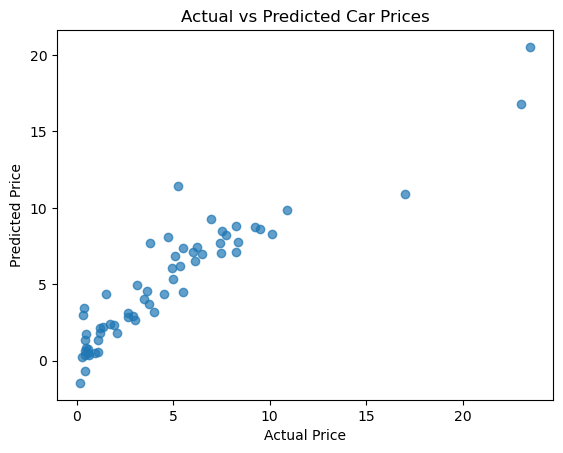

In [54]:
plt.scatter(target_test, target_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()